In [1]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

# 1.) Extracting & Reading in the important data file
  We want to read in both the homes and body fat csv files
  and get output tables



In [3]:
(bodyfat  :=
 pl.read_csv('./data/bodyfat.csv')
 )

shape: (252, 15)
┌─────────┬─────────┬─────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ density ┆ bodyfat ┆ age ┆ weight ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ ---     ┆ --- ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ f64     ┆ i64 ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════════╪═════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 1.0708  ┆ 12.3    ┆ 23  ┆ 154.25 ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 1.0853  ┆ 6.1     ┆ 22  ┆ 173.25 ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 1.0414  ┆ 25.3    ┆ 22  ┆ 154.0  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 1.0751  ┆ 10.4    ┆ 26  ┆ 184.75 ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 1.034   ┆ 28.7    ┆ 24  ┆ 184.25 ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
│ …       ┆ …       ┆ …   ┆ …      ┆ … ┆ …     ┆ …      ┆ …       ┆ …     │
│ 1.0736  ┆ 11.0    ┆ 70  ┆ 134.25 ┆ … ┆ 21.5  ┆ 25.6   ┆ 25.7    ┆ 18.5  │
│ 1.0236  ┆ 33.6    ┆ 72  ┆ 201.0  ┆ … ┆ 23.2  ┆ 35.2   ┆ 28.6    ┆ 20.1  │
│ 1.0328  ┆ 29.3    ┆ 72  ┆ 186.75 ┆ … ┆ 21.5  ┆ 31.3   ┆ 27.2    ┆ 18.0  │
│ 1.0399  ┆ 26.0    ┆ 72  ┆ 190.75 ┆ … ┆ 22.7  ┆ 30.5   ┆ 29.4    ┆ 19.8  │
│ 1.0271  ┆ 31.9    ┆ 74  ┆ 207.5  ┆ … ┆ 24.6  ┆ 33.7   ┆ 30.0    ┆ 20.9  │
└─────────┴─────────┴─────┴────────┴───┴───────┴────────┴─────────┴───────┘

# 2.) Visualizing Graphs for data with only numerical variables
We want to create a visualization that contains only vizzies that show relationship between 
numerical predictor and numeric target 

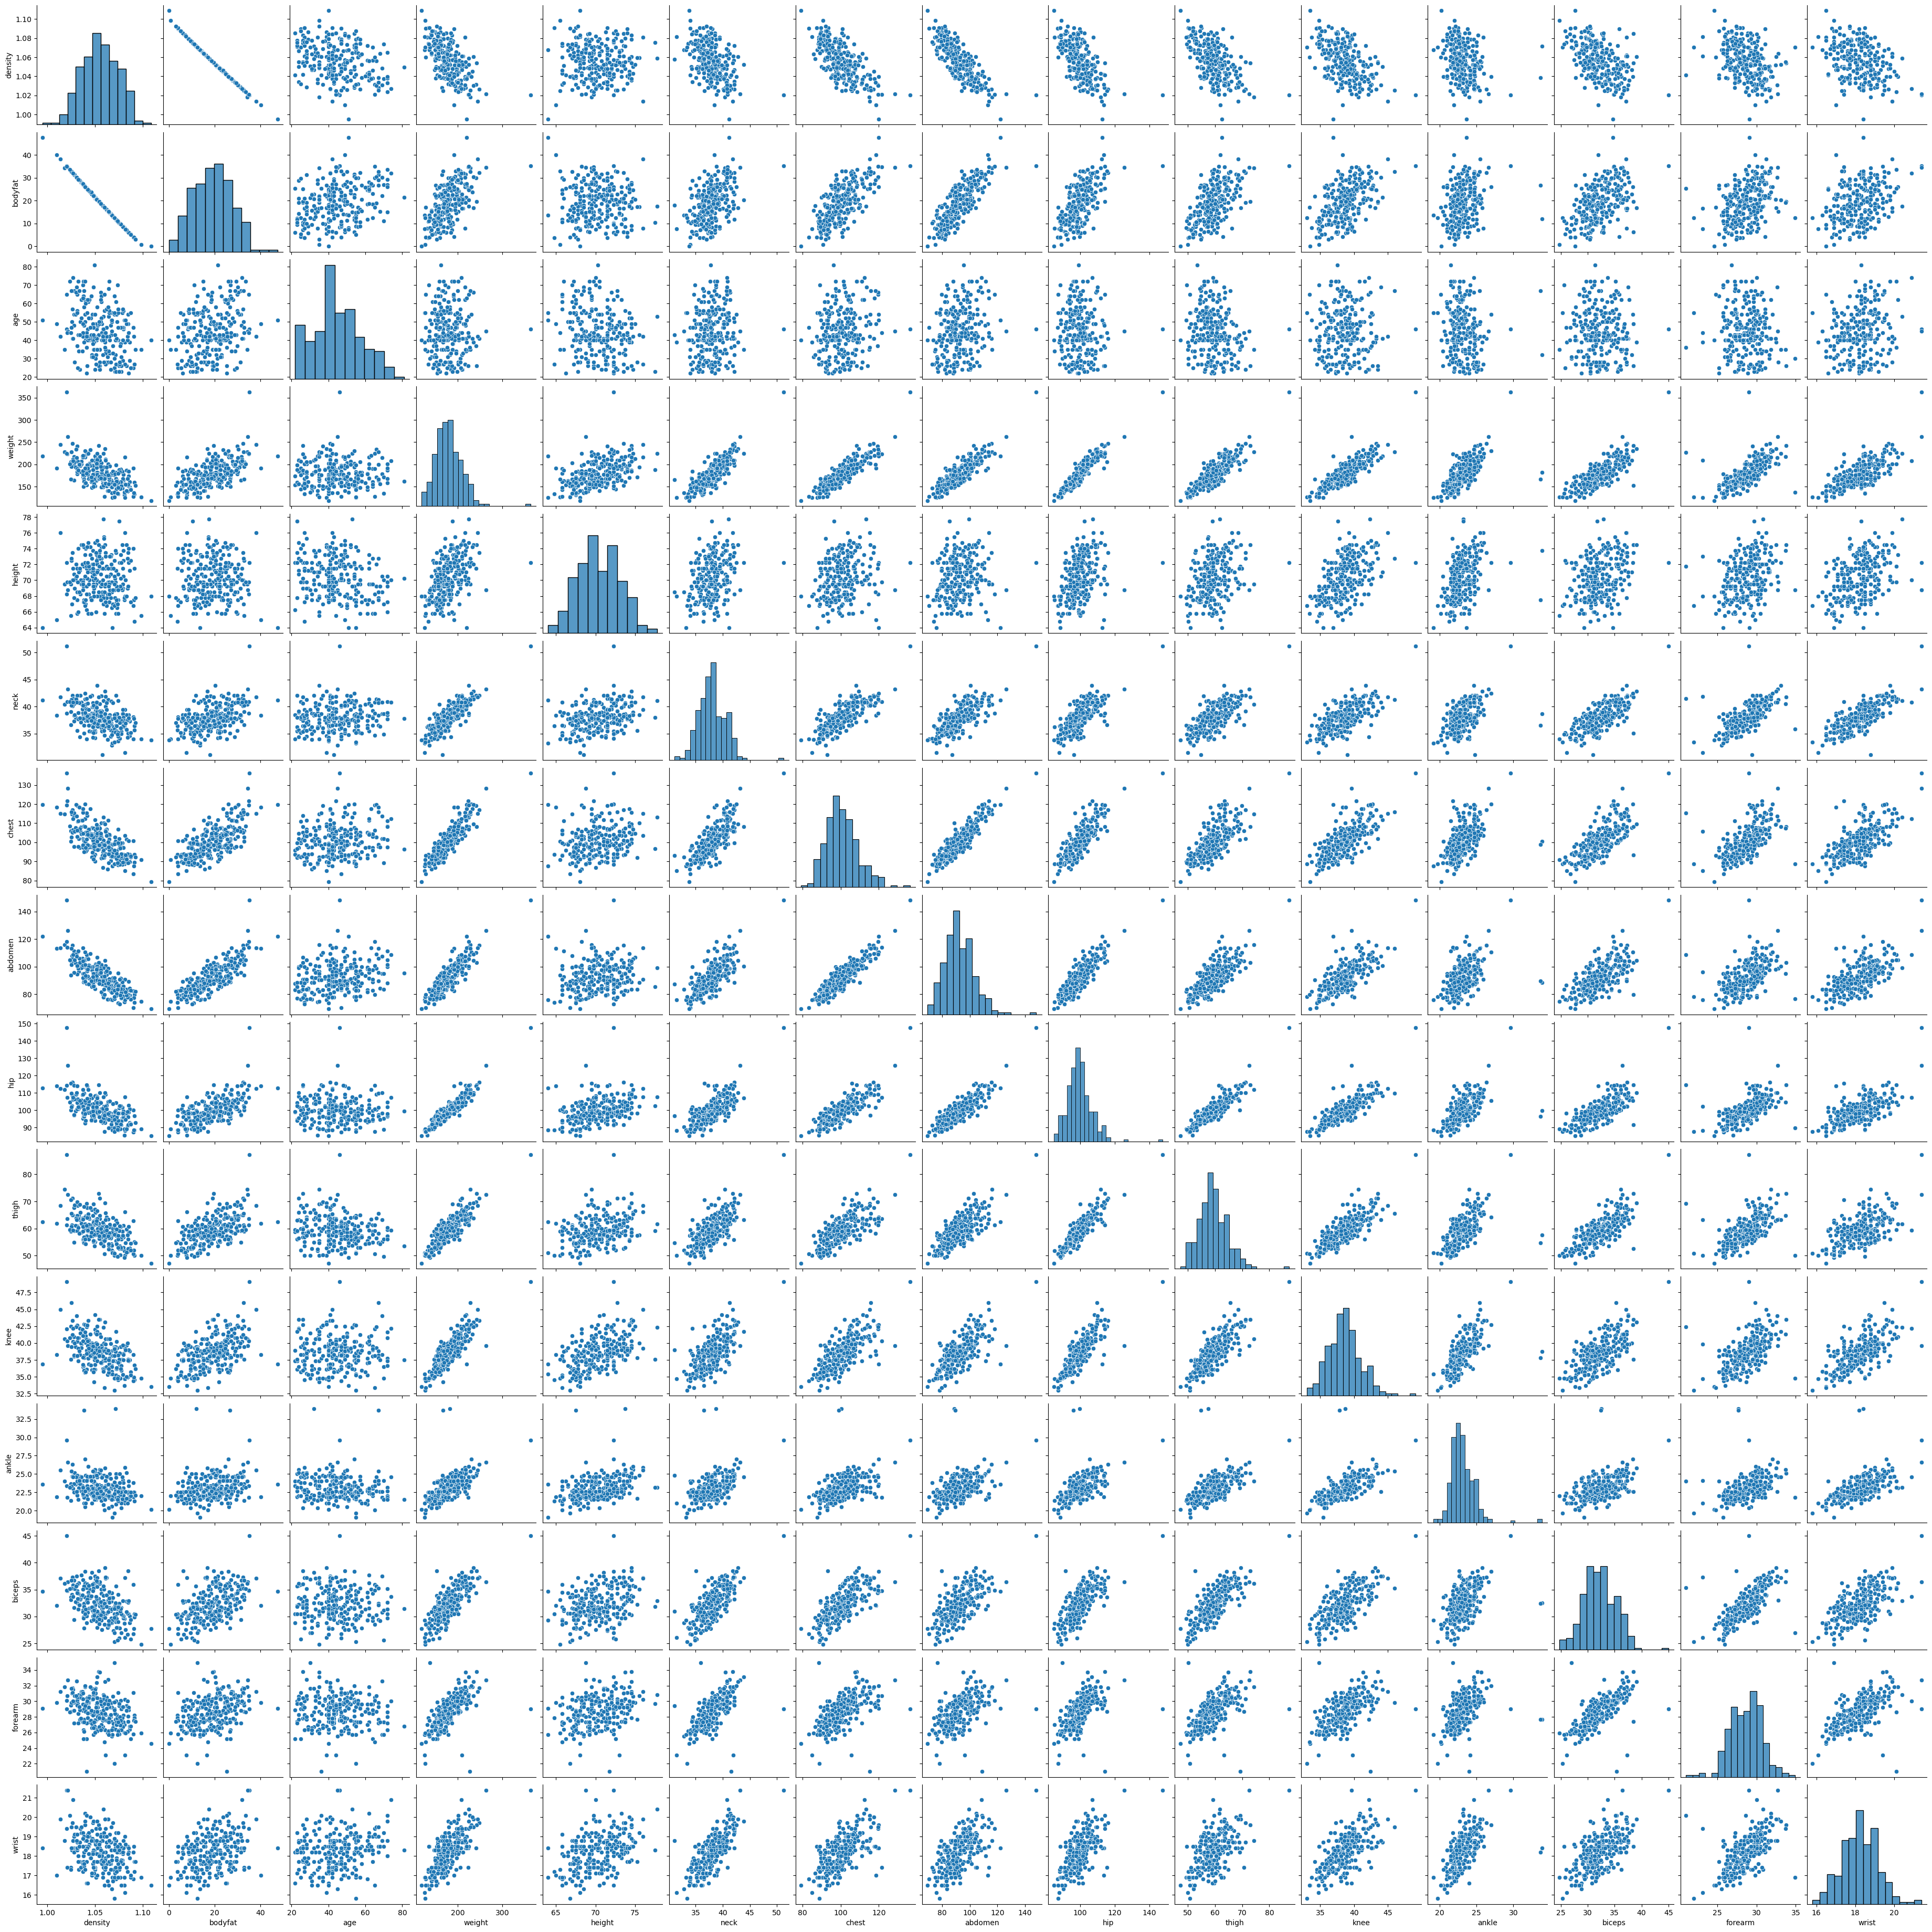

In [4]:
sns.pairplot(bodyfat.to_pandas())

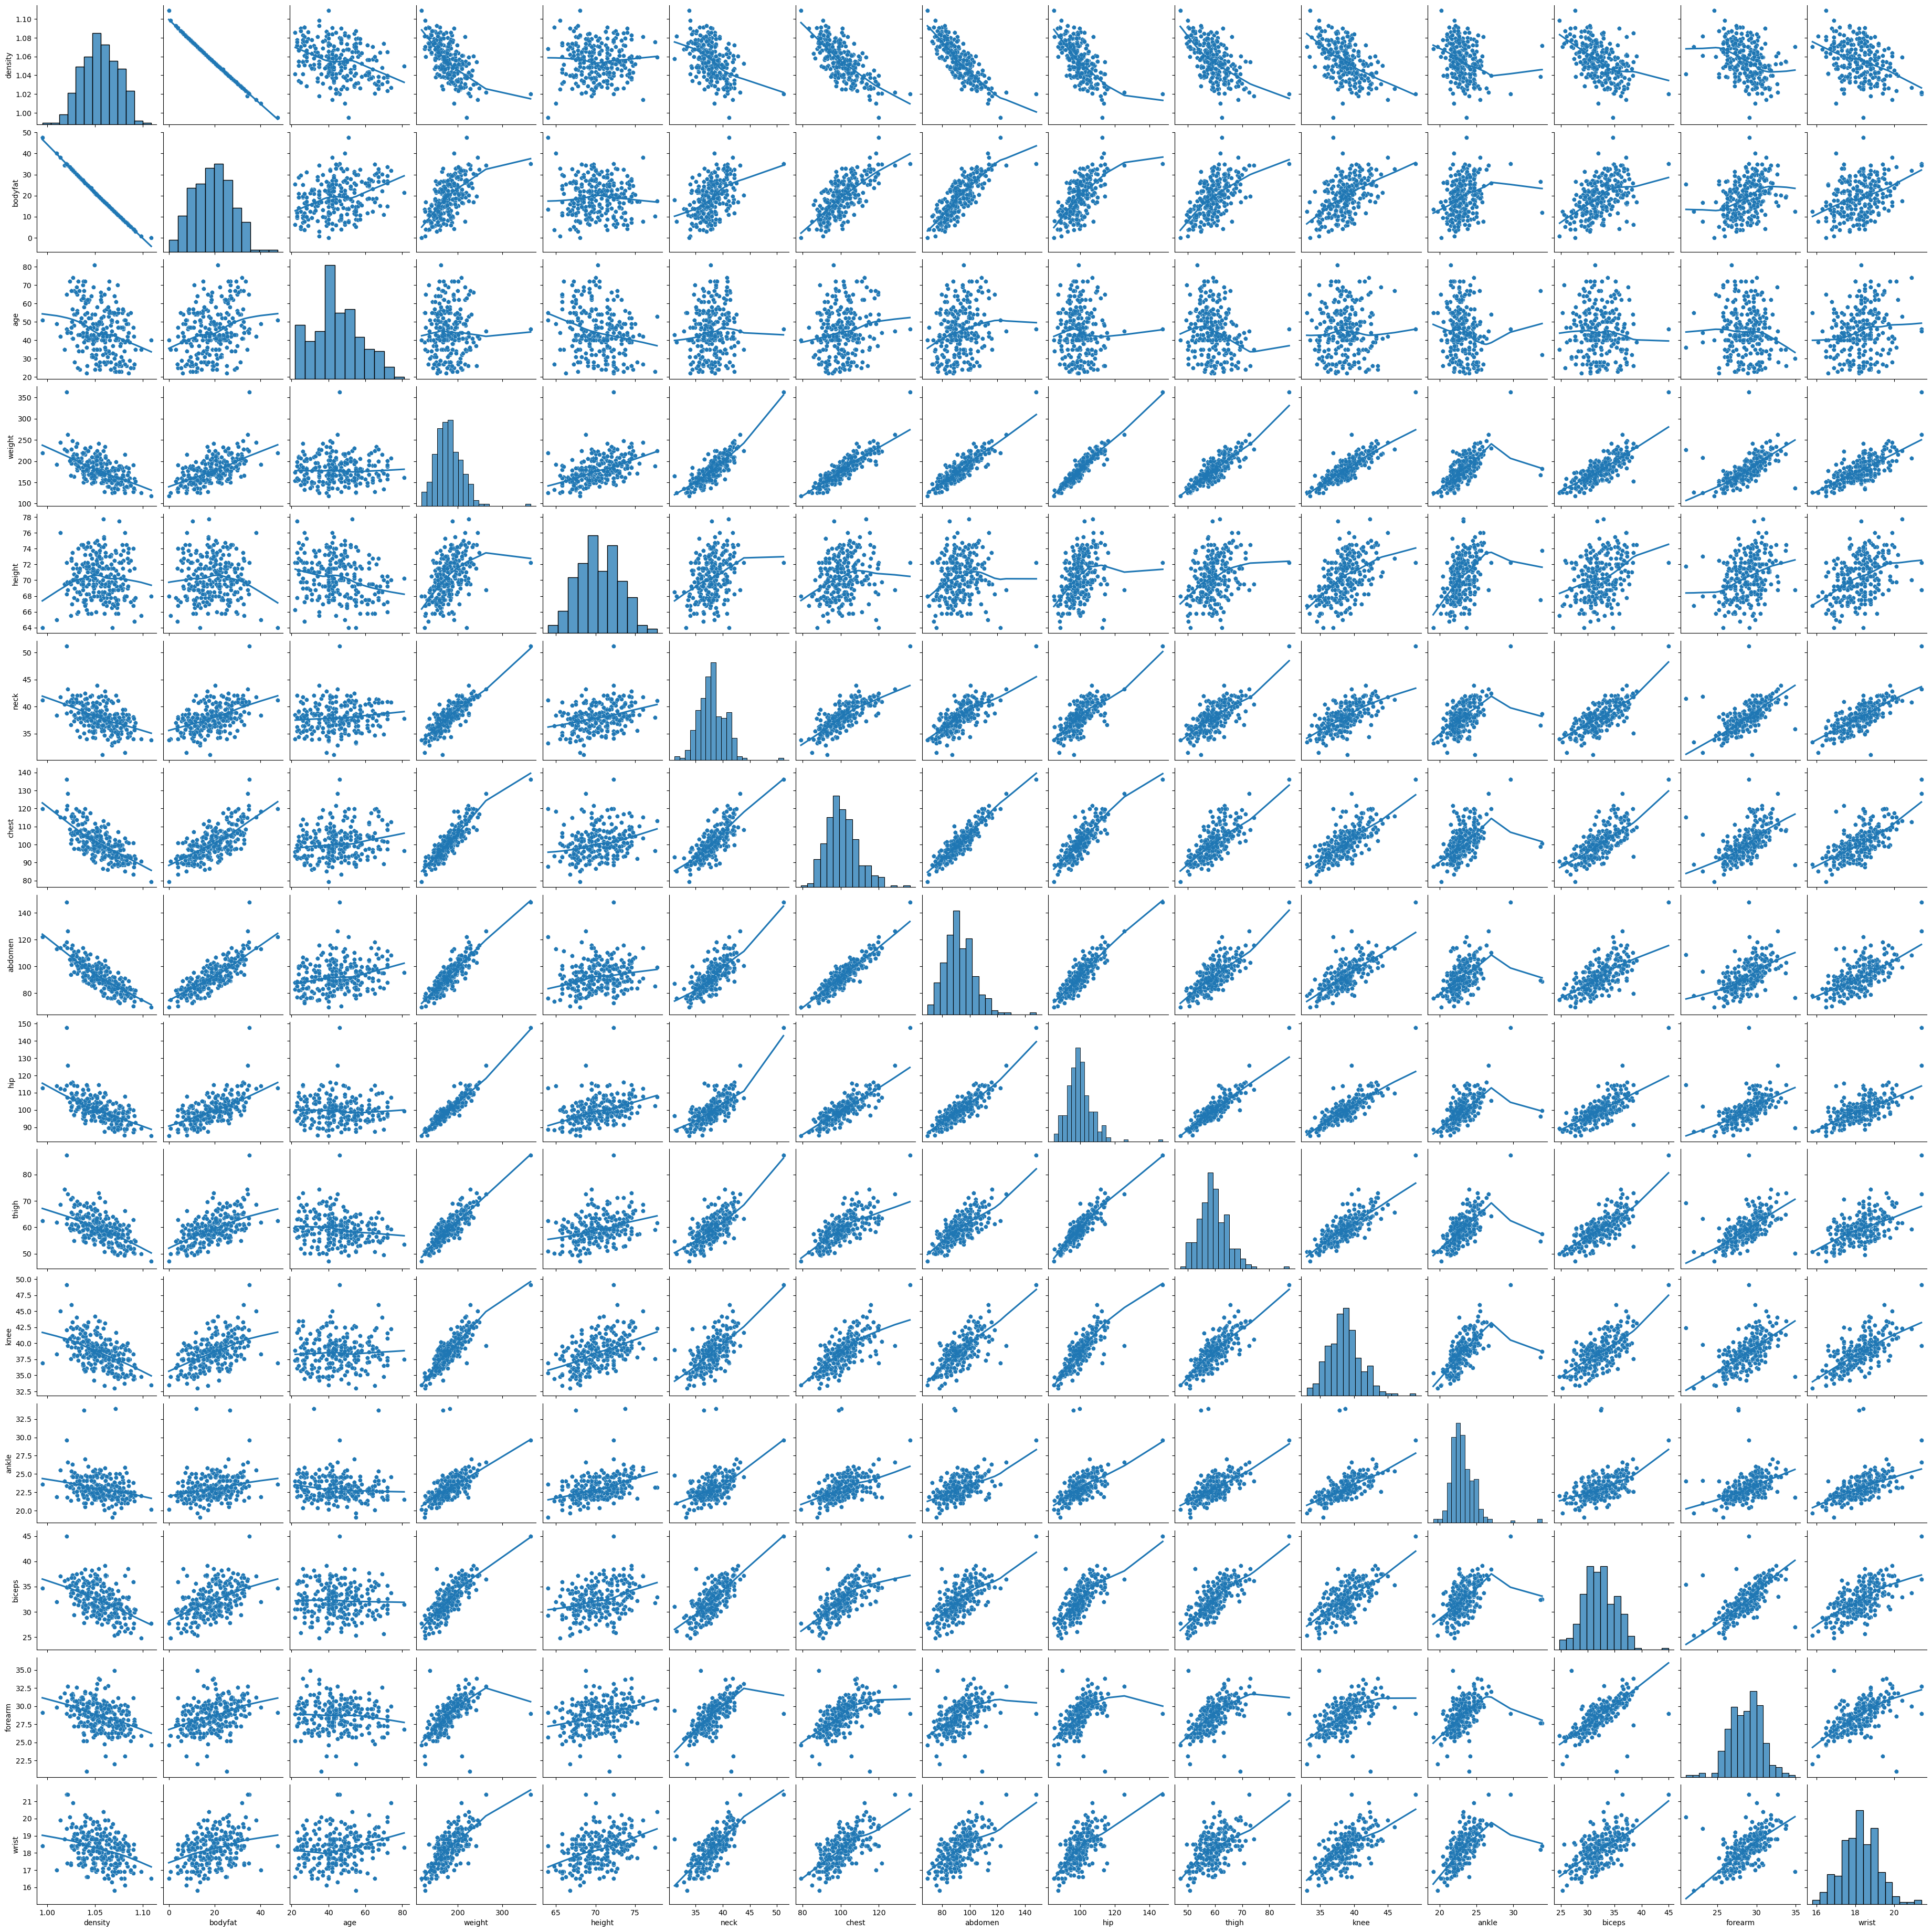

In [9]:
#sns.pairplot(bodyfat.to_pandas())
#sns.pairplot(bodyfat.to_pandas()).map_diag(sns.histplot)
sns.pairplot(bodyfat.to_pandas()).map_offdiag(sns.regplot, 
              lowess = True,
              marker = '+',
              scatter_kws = {'alpha': 0.5}
              )

# Summary of the pairplot graphs for bodyfat data  
Based on the pairplot scatterplot matrix, we can see that the histogram graphs provided in the pairplot shows that numerical variables that are normally distributed (no skewage) are the variables of density, bodyfat, height, chest, forearm and wrist. Indicating that those are the data is very symmetrical distributed around it's mean and that it has predictible spread overall. Numerical variables that are right-skewed are neck, abdomen, hip, knee, and ankle. These variables have characters indicate that the mean is distributed to the left of the mean and has a spread that is dragged to the left of the mean.  
